# 11.1)
데이터를 다루기 위한 차원이 높아지면 대부분의 점들이 경계선에 놓이게 되고, 데이터들 사이의 거리가 멀어짐에 따라 공간 내 데이터의 밀도가 낮아지게 되어 데이터들 사이의 관계를 파악하는 것이 힘들어지는 문제점을 차원 축소를 통해 해결할 수 있다. 또한, 차원 축소를 하게 되면 당연하게도 모델이 일반화되어 계산 복잡성이 낮아진다.

하지만, 차원 축소는 원본 데이터의 차원을 줄여서 정보를 압축하기 때문에 어쩔 수 없이 정보 손실이 발생하게 된다는 단점이 존재한다.

# 11.2)
PCA는 기존 데이터 벡터를 선형변환하여 투영하는 것이므로, 비선형 데이터 분포에 대해 적합하지 않다.
또한 PCA는 데이터의 분포가 가장 크게 되는 벡터를 찾는 것인데, 분포가 가장 커지는 벡터가 우리가 찾는 데이터의 특성을 항상 잘 표현한다고 할 수 없으며, 해당 축에 대한 의미를 분석하는 것도 어렵다.
마지막으로 기존 데이터에 이상치(outlier)가 포함되어 있는 경우 주성분이 이상치를 반영하게 될 수도 있다.


# 11.3)
## * Isomap
: 각 샘플에 대해 가장 가까운 샘플을 연결하여 그래프를 만들어 측지선 거리의 대소 관계를 유지하며 차원을 축소하는 기법. 측지선 거리는 그래프를 구성하는 노드들 사이의 최단경로를 계산하여 구할 수 있다.

장점 : 인스턴스 사이의 거리를 비선형 데이터 구조에 맞도록 계산해내기 때문에 비선형 구조를 가진 데이터도 차원 축소가 가능하다

단점 :  IsoMap이 사용하는 distance matrix M은 밀집행렬이어서 고유벡터를 구하는데 어려움이 있다.

## * LLE
: 모든 점에 대해 k개의 이웃 지점들을 찾고 모든 점에 대해 이웃 지점들과의 선형 관계를 찾는다.
그 다음 앞에서 찾은 선형관계가 유지되는 임베딩 공간을 찾는 방식이다.

장점 : 고유벡터를 사용하는 방법으로 다루기가 쉽고 지역 최적점(Local optimum)에 빠지지 않을 수 있다.
고차원의 데이터를 저차원의 데이터로 매핑이 가능하다.

단점 : 주어진 데이터에 대한 분석을 통하여 차원이 축소된 데이터로 변환을 시켜주는 데, 이 분석에 포함되지 않는 데이터가 주어진 경우에는 전체 데이터에 대하여 분석을 새롭게 수행하여야 하는 단점이 있다.

## * t-SNE
: 비슷한 데이터 인스턴스들끼리 가까운 거리를 유지하도록 하면서 더 낮은 차원의 임베딩 공간을 찾는 분석 방법이다.

장점 : 군집이 중복되지 않는다는 장점이 있다.

단점 : 매번 값이 바뀌는 특성으로 인하여, 머신러닝 모델의 학습 피쳐로 사용하기는 다소 어려운점이 있다.

# 11-4)

## *LLE

국소 선형성 (Local Linearity): LLE는 국소적으로 선형인 관계를 유지하려고 합니다. 즉, 주변 이웃들 간의 선형 관계를 보존하면서 데이터를 임베딩 공간에 투영하려는 목표를 가지고 있습니다.

## *Isomap

지오데식 거리 (Geodesic Distance): Isomap은 데이터 포인트들 사이의 지오데식 거리를 보존하려고 합니다. 이때, 지오데식 거리는 데이터 공간에서 가장 짧은 경로를 의미합니다. 이를 통해 임베딩 공간에서 데이터 포인트들 간의 관계를 보존하려는 목표를 가지고 있습니다.

## *t-SNE

유사도 확률 분포 (Similarity Probability Distribution): t-SNE는 원본 데이터와 임베딩 공간에서의 데이터 포인트 사이의 유사도를 확률 분포로 모델링합니다. 원본 데이터에서 비슷한 데이터 포인트는 임베딩 공간에서도 가깝게 유지되어야 하며, 다른 데이터 포인트와는 멀리 위치하도록 유사도를 보존하려는 목표를 가지고 있습니다.

# 11-5)

In [2]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)


In [3]:
from sklearn.decomposition import PCA

train_imgs_flat = X_test.reshape(-1,28*28)
pca = PCA(n_components = 50)

train_reduced = pca.fit_transform(train_imgs_flat)

In [4]:
from sklearn import manifold

lle = manifold.LocallyLinearEmbedding(n_neighbors=10,n_components=2)
train_lle = lle.fit_transform(train_reduced)

# 11-6)

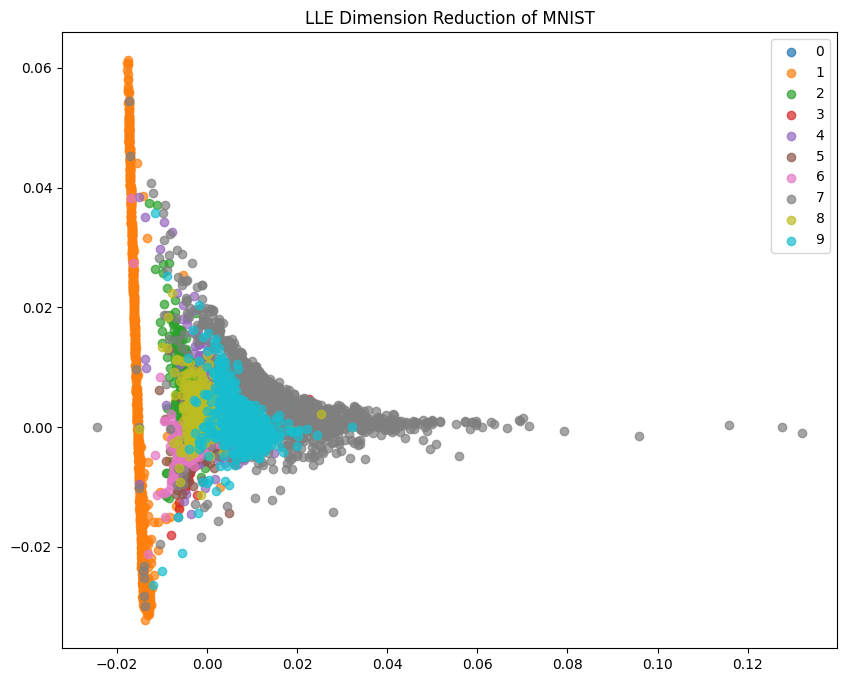

In [8]:
import matplotlib.pyplot as plt

# 시각화: 같은 숫자를 표현하는 데이터의 분포 확인
plt.figure(figsize=(10, 8))
for digit in range(10):
    indices = np.where(y_test == digit)[0]
    plt.scatter(train_lle[indices, 0], train_lle[indices, 1], label=str(digit), alpha=0.7)
plt.title("LLE Dimension Reduction of MNIST")
plt.legend()
plt.show()

# 11-7)


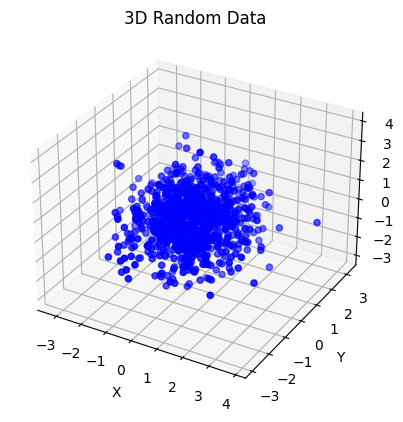

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 3차원 랜덤 데이터 생성
np.random.seed(42)
num_samples = 1000
x = np.random.randn(num_samples)
y = np.random.randn(num_samples)
z = np.random.randn(num_samples)

# 데이터 시각화 (3차원)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Random Data')
plt.show()

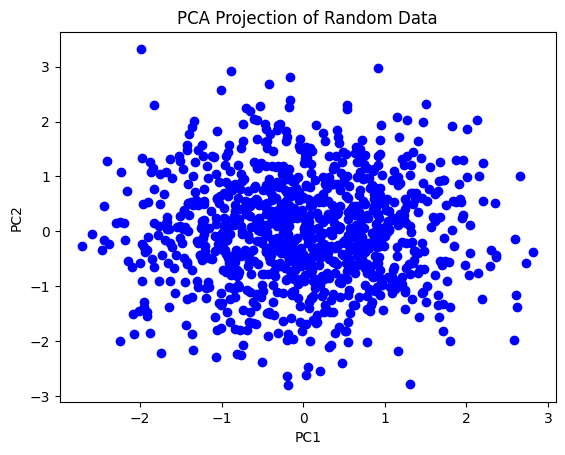

In [10]:
# 데이터 결합
data = np.column_stack((x, y, z))

# 주성분 분석 (PCA)을 통한 2차원 투영
pca = PCA(n_components=2)
data_projected = pca.fit_transform(data)

# 주성분 분석 결과 시각화 (2차원)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c='b', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Random Data')
plt.show()

# 11-8)

생성된 데이터는 3차원 데이터로 (x, y, z)로 표현되고 있다.
데이터의 분산을 최대로 보존하는 축인 주성분(PC, Principal Component)을 찾는 과정을 주성분 분석이라 하는데
해당 문제에서는 2개의 주성분을 분석하였고 첫번째 주성분은 데이터의 분산을 가장 크게 설명할 수 있는 방향을 나타내며,
두 번째 주성분(PC2)은 첫 번째 주성분과 직교하는 방향 중에서 데이터의 분산을 가장 크게 설명할 수 있는 방향이다.
주성분 분석을 통해 찾은 주성분을 기준으로 데이터를 2차원으로 투영하였고
그 결과 비슷한 패턴이나 구조를 가진 데이터들이 가까이 위치하는 것을 확인할 수 있다.